# Introduction 

The plant Growth dataset. 


In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro


In [45]:
df = pd.read_csv('PlantGrowth.csv')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [47]:
df.dtypes

rownames      int64
weight      float64
group        object
dtype: object

In [48]:
df.isnull()

,rownames,weight,group
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [49]:
df1 = df.drop(columns='rownames')

In [50]:
df1.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


# Breakdown of data set 

 weight

A numeric variable representing the weight of plants after a certain period of growth. and has a Continuous numerical variable. the values  represents the biomass or size of plant samples.

group

A categorical variable representing different experimental conditions. There are three categories here
1. ctrl: The control group, which doesn’t receive any special treatment.
2. trt1: The first treatment group.
3. trt2: The second treatment group.

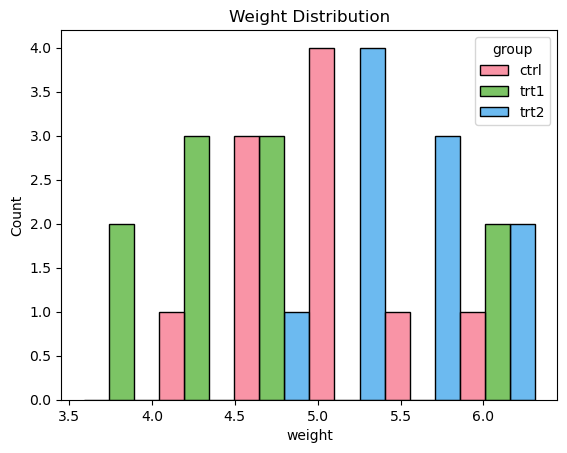

In [51]:
sns.histplot(data=df1, x=df['weight'], hue='group', multiple="dodge", palette='husl').set_title('Weight Distribution')
plt.show()

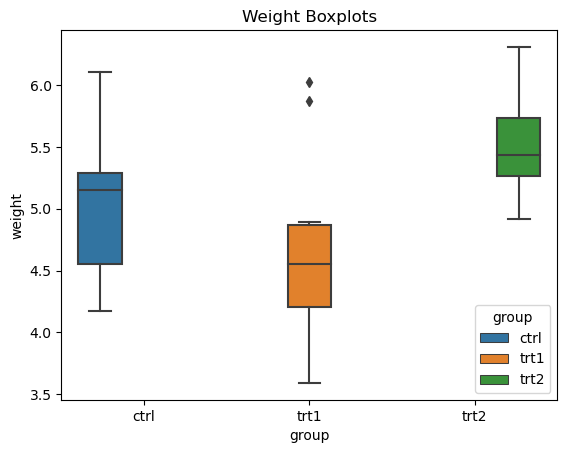

In [52]:
sns.boxplot(data=df1, y=df['weight'], x='group', hue='group').set_title('Weight Boxplots')
plt.show()

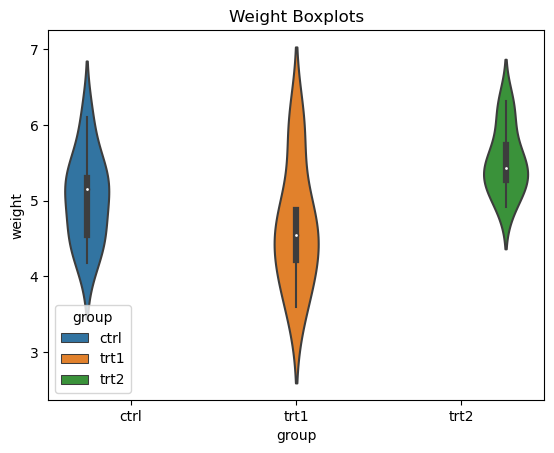

In [53]:
sns.violinplot(data=df1, y=df['weight'], x='group', hue='group').set_title('Weight Boxplots')
plt.show()

<Axes: xlabel='weight', ylabel='Density'>

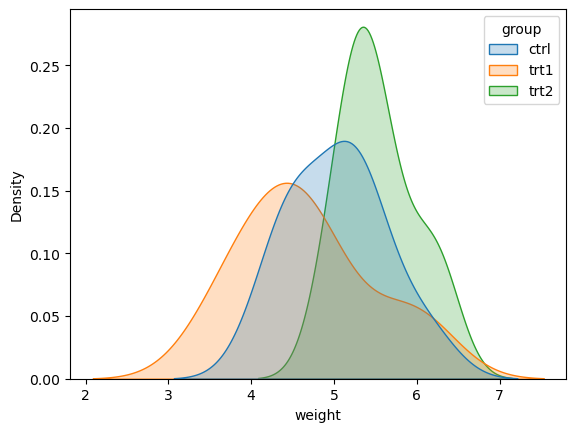

In [54]:
sns.kdeplot(data=df1, x="weight", hue="group", fill=True)


c:\Users\keith\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


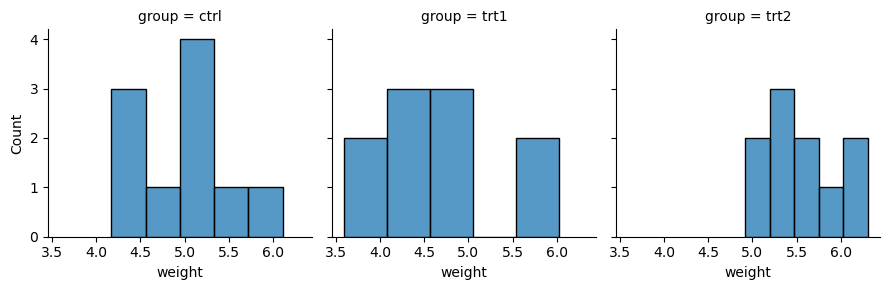

In [55]:
g = sns.FacetGrid(df1, col="group")
g.map(sns.histplot, "weight")


# testing distubution 

In [56]:
stat, p_value = shapiro(df1['weight'])

# Output the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", stat)
print("p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("The weight data follows a normal distribution (fail to reject H0).")
else:
    print("The weight data does not follow a normal distribution (reject H0).")

Shapiro-Wilk Test Statistic: 0.9826829433441162
p-value: 0.8915055394172668
The weight data follows a normal distribution (fail to reject H0).


# T tests 

In this project one of the areas we will be looking at is t tests. A t test is a method used to find the difference in the means between two groups and how these groups are related. for example if we wanted to look at the number of smoker and non smokers in a givng group we could use a t test to compare these. The outcome of these tests is known as the T value.

Types of t tests 
One Sample t-test 

In [57]:

import  scipy.stats as stats 
data = [300, 315, 320, 311, 314, 309, 300, 308, 305, 301, 303]

stats.ttest_1samp(a=data, popmean=310)



TtestResult(statistic=-1.0791558906442464, pvalue=0.30585914629755523, df=10)

Two Sample t-test

In [58]:
sample1 = [300, 315, 320, 311, 314, 309, 300, 308, 305, 303, 305, 301, 303]
sample2 = [335, 329, 322, 321, 324, 319, 304, 308, 305, 311, 307, 300, 305]

#perform two sample t-test
stats.ttest_ind(a=sample1, b=sample2) 

TtestResult(statistic=-2.10090292575557, pvalue=0.04633501389516513, df=24.0)